<a href="https://colab.research.google.com/github/AtulAravindDas/MYMLDLDAPROJECTS/blob/main/ChicagoCrimeRate_using_Facebook_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Installing the prophet library**

In [ ]:
!pip install pystan==2.19.1.1
!pip install fbprophet


  Using cached pystan-2.19.1.1.tar.gz (16.2 MB)
  Preparing metadata (setup.py) ... done
  Created wheel for pystan: filename=pystan-2.19.1.1-cp310-cp310-linux_x86_64.whl size=61975256 sha256=66ba5a401bbfe372c0d2efd1ba28b7de44d84fd41c4b2f895e3d709ccd559fc4
  Stored in directory: /root/.cache/pip/wheels/3d/1c/94/4516243362eedbedad15ac4389691ee3bf2d45bec2639c9d8b
Successfully built pystan
  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py) ... done
  Using cached cmdstanpy-0.9.5-py3-none-any.whl.metadata (2.9 kB)
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl.metadata (6.3 kB)
  Using cached convertdate-2.4.0-py3-none-any.whl.metadata (8.3 kB)
  Using cached setuptools_git-1.2-py2.py3-none-any.whl.metadata (5.8 kB)
  Using cached PyMeeus-0.5.12-py3-none-any.whl
  Using cached ephem-4.1.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.0 kB)
Using cached cmdstanpy-0.9.5-py3-none-any.whl (37 kB)
Using cached convertdate-2.4.0-py3-no

In [ ]:
!pip install cmdstanpy
!pip install prophet


In [ ]:
!pip show prophet


Name: prophet
Version: 1.1.5
Summary: Automatic Forecasting Procedure
Home-page: https://facebook.github.io/prophet/
Author: 
Author-email: "Sean J. Taylor" <sjtz@pm.me>, Ben Letham <bletham@fb.com>
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: cmdstanpy, holidays, importlib-resources, matplotlib, numpy, pandas, tqdm
Required-by: 


In [ ]:
try:
    from prophet import Prophet
    print("Prophet imported successfully.")
except ImportError as e:
    print(f"Error importing Prophet: {e}")


Prophet imported successfully.


# **Importing the Data and Creation of Data**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
import warnings
warnings.filterwarnings('ignore')


In [2]:
chunk_size = 100000
chunks = []
for chunk in pd.read_csv('/content/drive/MyDrive/Datasets/Chicago_Crimes_2008_to_2011.csv', chunksize=chunk_size, on_bad_lines='warn'):
    chunks.append(chunk)
chicago_crime_dataset1 = pd.concat(chunks, ignore_index=True)
chicago_crime_dataset1.head()


Skipping line 1149094: expected 23 fields, saw 41



,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,388,4785,HP610824,10/07/2008 12:39:00 PM,000XX E 75TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,ALLEY,True,...,6.0,69.0,01A,1178207.0,1855308.0,2008,08/17/2015 03:03:40 PM,41.758276,-87.622451,"(41.758275857, -87.622451031)"
1,835,4786,HP616595,10/09/2008 03:30:00 AM,048XX W POLK ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,...,24.0,25.0,01A,1144200.0,1895857.0,2008,08/17/2015 03:03:40 PM,41.870252,-87.746069,"(41.87025207, -87.746069362)"
2,1334,4787,HP616904,10/09/2008 08:35:00 AM,030XX W MANN DR,0110,HOMICIDE,FIRST DEGREE MURDER,PARK PROPERTY,False,...,18.0,66.0,01A,1157314.0,1859778.0,2008,08/17/2015 03:03:40 PM,41.770990,-87.698901,"(41.770990476, -87.698901469)"
3,1907,4788,HP618616,10/10/2008 02:33:00 AM,052XX W CHICAGO AVE,0110,HOMICIDE,FIRST DEGREE MURDER,RESTAURANT,False,...,37.0,25.0,01A,1141065.0,1904824.0,2008,08/17/2015 03:03:40 PM,41.894917,-87.757358,"(41.894916924, -87.757358147)"
4,2436,4789,HP619020,10/10/2008 12:50:00 PM,026XX S HOMAN AVE,0110,HOMICIDE,FIRST DEGREE MURDER,GARAGE,False,...,22.0,30.0,01A,1154123.0,1886297.0,2008,08/17/2015 03:03:40 PM,41.843826,-87.709893,"(41.843826272, -87.709893465)"


In [3]:
chicago_crime_dataset1.shape

(2688710, 23)

In [4]:
chicago_crime_dataset1=chicago_crime_dataset1.drop(['Unnamed: 0'],axis=1)
chicago_crime_dataset1.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,4785,HP610824,10/07/2008 12:39:00 PM,000XX E 75TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,ALLEY,True,False,...,6.0,69.0,01A,1178207.0,1855308.0,2008,08/17/2015 03:03:40 PM,41.758276,-87.622451,"(41.758275857, -87.622451031)"
1,4786,HP616595,10/09/2008 03:30:00 AM,048XX W POLK ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,24.0,25.0,01A,1144200.0,1895857.0,2008,08/17/2015 03:03:40 PM,41.870252,-87.746069,"(41.87025207, -87.746069362)"
2,4787,HP616904,10/09/2008 08:35:00 AM,030XX W MANN DR,0110,HOMICIDE,FIRST DEGREE MURDER,PARK PROPERTY,False,False,...,18.0,66.0,01A,1157314.0,1859778.0,2008,08/17/2015 03:03:40 PM,41.770990,-87.698901,"(41.770990476, -87.698901469)"
3,4788,HP618616,10/10/2008 02:33:00 AM,052XX W CHICAGO AVE,0110,HOMICIDE,FIRST DEGREE MURDER,RESTAURANT,False,False,...,37.0,25.0,01A,1141065.0,1904824.0,2008,08/17/2015 03:03:40 PM,41.894917,-87.757358,"(41.894916924, -87.757358147)"
4,4789,HP619020,10/10/2008 12:50:00 PM,026XX S HOMAN AVE,0110,HOMICIDE,FIRST DEGREE MURDER,GARAGE,False,True,...,22.0,30.0,01A,1154123.0,1886297.0,2008,08/17/2015 03:03:40 PM,41.843826,-87.709893,"(41.843826272, -87.709893465)"


In [5]:
chicago_crime_dataset1 = chicago_crime_dataset1.sample(frac=0.01, random_state=42)


In [6]:
chicago_crime_dataset1

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
108584,6172179,HP253909,03/31/2008 02:15:00 PM,019XX S MICHIGAN AVE,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,...,2.0,33.0,05,1177518.0,1891016.0,2008,02/04/2016 06:33:39 AM,41.856277,-87.623896,"(41.856277428, -87.62389589)"
325848,6523639,HP597274,09/28/2008 12:20:00 AM,113XX S ELIZABETH ST,0460,BATTERY,SIMPLE,RESIDENCE,True,False,...,34.0,75.0,08B,1170029.0,1829378.0,2008,02/04/2016 06:33:39 AM,41.687302,-87.653173,"(41.687301655, -87.653173408)"
1529438,6610157,HP682636,11/14/2008 11:15:00 AM,003XX N PARKSIDE AVE,2024,NARCOTICS,POSS: HEROIN(WHITE),STREET,True,False,...,29.0,25.0,18,1138536.0,1901628.0,2008,02/04/2016 06:33:39 AM,41.886193,-87.766724,"(41.886192908, -87.766724132)"
936991,7490104,HS292916,05/03/2010 07:00:00 AM,062XX W PETERSON AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,...,45.0,10.0,26,1133387.0,1939478.0,2010,02/04/2016 06:33:39 AM,41.990149,-87.784743,"(41.990149289, -87.784743307)"
2156251,7601224,HS406259,07/05/2010 12:00:00 AM,008XX S PARK TER,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,...,2.0,32.0,26,1175925.0,1896500.0,2010,02/04/2016 06:33:39 AM,41.871362,-87.629578,"(41.871361856, -87.629577951)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875095,7394869,HS194257,03/06/2010 11:00:00 AM,012XX S KARLOV AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,True,...,24.0,29.0,14,1149247.0,1894049.0,2010,02/04/2016 06:33:39 AM,41.865194,-87.727587,"(41.86519446, -87.727586886)"
1992045,7345557,HS147606,02/01/2010 09:00:00 PM,050XX W DEMING PL,051A,ASSAULT,AGGRAVATED: HANDGUN,STREET,False,False,...,31.0,19.0,04A,1142461.0,1916500.0,2010,02/04/2016 06:33:39 AM,41.926931,-87.751940,"(41.926931316, -87.751940272)"
598972,6967865,HR372312,06/12/2009 08:45:00 PM,017XX W HOWARD ST,0860,THEFT,RETAIL THEFT,GROCERY FOOD STORE,True,False,...,49.0,1.0,06,1163126.0,1950347.0,2009,02/04/2016 06:33:39 AM,42.019399,-87.675049,"(42.019399237, -87.675049485)"
248542,6396944,HP481644,07/28/2008 07:30:00 PM,109XX S HOMAN AVE,0560,ASSAULT,SIMPLE,"SCHOOL, PUBLIC, GROUNDS",True,False,...,19.0,74.0,08A,1155612.0,1831960.0,2008,02/04/2016 06:33:39 AM,41.694687,-87.705884,"(41.694687402, -87.705883803)"


In [7]:
chicago_crime_dataset1.shape

(26887, 22)

In [8]:
chunk_size = 100000
chunks = []
for chunk in pd.read_csv('/content/drive/MyDrive/Datasets/Chicago_Crimes_2012_to_2017.csv', chunksize=chunk_size, on_bad_lines='warn'):
    chunks.append(chunk)
chicago_crime_dataset2 = pd.concat(chunks, ignore_index=True)
chicago_crime_dataset2.head()


,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [9]:
chicago_crime_dataset2.shape

(1456714, 23)

In [10]:
chicago_crime_dataset2 = chicago_crime_dataset2.sample(frac=0.01, random_state=42)


In [11]:
chicago_crime_dataset2.shape

(14567, 23)

In [12]:
chicago_crime_dataset=pd.concat([chicago_crime_dataset1,chicago_crime_dataset2])
chicago_crime_dataset

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Unnamed: 0
108584,6172179,HP253909,03/31/2008 02:15:00 PM,019XX S MICHIGAN AVE,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,...,33.0,05,1177518.0,1891016.0,2008,02/04/2016 06:33:39 AM,41.856277,-87.623896,"(41.856277428, -87.62389589)",NaN
325848,6523639,HP597274,09/28/2008 12:20:00 AM,113XX S ELIZABETH ST,0460,BATTERY,SIMPLE,RESIDENCE,True,False,...,75.0,08B,1170029.0,1829378.0,2008,02/04/2016 06:33:39 AM,41.687302,-87.653173,"(41.687301655, -87.653173408)",NaN
1529438,6610157,HP682636,11/14/2008 11:15:00 AM,003XX N PARKSIDE AVE,2024,NARCOTICS,POSS: HEROIN(WHITE),STREET,True,False,...,25.0,18,1138536.0,1901628.0,2008,02/04/2016 06:33:39 AM,41.886193,-87.766724,"(41.886192908, -87.766724132)",NaN
936991,7490104,HS292916,05/03/2010 07:00:00 AM,062XX W PETERSON AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,...,10.0,26,1133387.0,1939478.0,2010,02/04/2016 06:33:39 AM,41.990149,-87.784743,"(41.990149289, -87.784743307)",NaN
2156251,7601224,HS406259,07/05/2010 12:00:00 AM,008XX S PARK TER,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,...,32.0,26,1175925.0,1896500.0,2010,02/04/2016 06:33:39 AM,41.871362,-87.629578,"(41.871361856, -87.629577951)",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83769,8433452,HV110974,01/09/2012 01:44:00 PM,033XX N DAMEN AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,False,True,...,5.0,08B,1162419.0,1922373.0,2012,02/04/2016 06:33:39 AM,41.942652,-87.678438,"(41.942652421, -87.678438219)",2415002.0
149009,8541456,HV217566,03/28/2012 04:50:00 AM,010XX N LECLAIRE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,True,True,...,25.0,08B,1142169.0,1906521.0,2012,02/04/2016 06:33:39 AM,41.899553,-87.753261,"(41.899553281, -87.753261259)",2482198.0
669889,9375991,HW519598,11/03/2013 10:32:00 PM,042XX S INDIANA AVE,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,True,False,...,38.0,18,1178305.0,1876956.0,2013,02/04/2016 06:33:39 AM,41.817678,-87.621435,"(41.817677866, -87.621434949)",3005086.0
893384,9759284,HX409271,08/31/2014 12:14:00 AM,011XX N DEARBORN ST,0460,BATTERY,SIMPLE,STREET,False,False,...,8.0,08B,1175722.0,1908174.0,2014,02/04/2016 06:33:39 AM,41.903401,-87.629972,"(41.903400522, -87.62997193)",3228767.0


In [13]:
chicago_crime_dataset.shape

(41454, 23)

# **Data Exploration**

In [14]:
chicago_crime_dataset

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Unnamed: 0
108584,6172179,HP253909,03/31/2008 02:15:00 PM,019XX S MICHIGAN AVE,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,...,33.0,05,1177518.0,1891016.0,2008,02/04/2016 06:33:39 AM,41.856277,-87.623896,"(41.856277428, -87.62389589)",NaN
325848,6523639,HP597274,09/28/2008 12:20:00 AM,113XX S ELIZABETH ST,0460,BATTERY,SIMPLE,RESIDENCE,True,False,...,75.0,08B,1170029.0,1829378.0,2008,02/04/2016 06:33:39 AM,41.687302,-87.653173,"(41.687301655, -87.653173408)",NaN
1529438,6610157,HP682636,11/14/2008 11:15:00 AM,003XX N PARKSIDE AVE,2024,NARCOTICS,POSS: HEROIN(WHITE),STREET,True,False,...,25.0,18,1138536.0,1901628.0,2008,02/04/2016 06:33:39 AM,41.886193,-87.766724,"(41.886192908, -87.766724132)",NaN
936991,7490104,HS292916,05/03/2010 07:00:00 AM,062XX W PETERSON AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,...,10.0,26,1133387.0,1939478.0,2010,02/04/2016 06:33:39 AM,41.990149,-87.784743,"(41.990149289, -87.784743307)",NaN
2156251,7601224,HS406259,07/05/2010 12:00:00 AM,008XX S PARK TER,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,...,32.0,26,1175925.0,1896500.0,2010,02/04/2016 06:33:39 AM,41.871362,-87.629578,"(41.871361856, -87.629577951)",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83769,8433452,HV110974,01/09/2012 01:44:00 PM,033XX N DAMEN AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,False,True,...,5.0,08B,1162419.0,1922373.0,2012,02/04/2016 06:33:39 AM,41.942652,-87.678438,"(41.942652421, -87.678438219)",2415002.0
149009,8541456,HV217566,03/28/2012 04:50:00 AM,010XX N LECLAIRE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,True,True,...,25.0,08B,1142169.0,1906521.0,2012,02/04/2016 06:33:39 AM,41.899553,-87.753261,"(41.899553281, -87.753261259)",2482198.0
669889,9375991,HW519598,11/03/2013 10:32:00 PM,042XX S INDIANA AVE,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,True,False,...,38.0,18,1178305.0,1876956.0,2013,02/04/2016 06:33:39 AM,41.817678,-87.621435,"(41.817677866, -87.621434949)",3005086.0
893384,9759284,HX409271,08/31/2014 12:14:00 AM,011XX N DEARBORN ST,0460,BATTERY,SIMPLE,STREET,False,False,...,8.0,08B,1175722.0,1908174.0,2014,02/04/2016 06:33:39 AM,41.903401,-87.629972,"(41.903400522, -87.62997193)",3228767.0


In [15]:
chicago_crime_dataset.head(10)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Unnamed: 0
108584,6172179,HP253909,03/31/2008 02:15:00 PM,019XX S MICHIGAN AVE,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,...,33.0,05,1177518.0,1891016.0,2008,02/04/2016 06:33:39 AM,41.856277,-87.623896,"(41.856277428, -87.62389589)",NaN
325848,6523639,HP597274,09/28/2008 12:20:00 AM,113XX S ELIZABETH ST,0460,BATTERY,SIMPLE,RESIDENCE,True,False,...,75.0,08B,1170029.0,1829378.0,2008,02/04/2016 06:33:39 AM,41.687302,-87.653173,"(41.687301655, -87.653173408)",NaN
1529438,6610157,HP682636,11/14/2008 11:15:00 AM,003XX N PARKSIDE AVE,2024,NARCOTICS,POSS: HEROIN(WHITE),STREET,True,False,...,25.0,18,1138536.0,1901628.0,2008,02/04/2016 06:33:39 AM,41.886193,-87.766724,"(41.886192908, -87.766724132)",NaN
936991,7490104,HS292916,05/03/2010 07:00:00 AM,062XX W PETERSON AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,...,10.0,26,1133387.0,1939478.0,2010,02/04/2016 06:33:39 AM,41.990149,-87.784743,"(41.990149289, -87.784743307)",NaN
2156251,7601224,HS406259,07/05/2010 12:00:00 AM,008XX S PARK TER,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,...,32.0,26,1175925.0,1896500.0,2010,02/04/2016 06:33:39 AM,41.871362,-87.629578,"(41.871361856, -87.629577951)",NaN
1568793,6673721,HP746057,12/22/2008 01:35:00 PM,112XX S PARNELL AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,...,49.0,26,1174641.0,1830367.0,2008,02/04/2016 06:33:39 AM,41.689914,-87.636260,"(41.689914459, -87.636260196)",NaN
347444,6556565,HP624873,10/13/2008 12:20:00 PM,003XX W SUPERIOR ST,0850,THEFT,ATTEMPT THEFT,GROCERY FOOD STORE,True,False,...,8.0,06,1173684.0,1905296.0,2008,02/04/2016 06:33:39 AM,41.895549,-87.637544,"(41.895548745, -87.637543608)",NaN
612805,6989893,HR388636,06/15/2009 09:00:00 AM,085XX S SANGAMON ST,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,71.0,07,1171472.0,1848174.0,2009,02/04/2016 06:33:39 AM,41.738849,-87.647343,"(41.738849293, -87.647342556)",NaN
2250047,7745147,HS552979,10/07/2010 07:00:00 PM,118XX S STATE ST,0810,THEFT,OVER $500,OTHER,False,False,...,53.0,06,1178386.0,1826243.0,2010,02/04/2016 06:33:39 AM,41.678514,-87.622674,"(41.678513612, -87.622674282)",NaN
1324839,6282031,HP370462,06/01/2008 06:00:00 PM,020XX E 75TH ST,0810,THEFT,OVER $500,OTHER,False,False,...,43.0,06,1191305.0,1855646.0,2008,02/04/2016 06:33:39 AM,41.758896,-87.574438,"(41.75889632, -87.574437844)",NaN


In [16]:
chicago_crime_dataset.columns.tolist()

['ID',
 'Case Number',
 'Date',
 'Block',
 'IUCR',
 'Primary Type',
 'Description',
 'Location Description',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'Community Area',
 'FBI Code',
 'X Coordinate',
 'Y Coordinate',
 'Year',
 'Updated On',
 'Latitude',
 'Longitude',
 'Location',
 'Unnamed: 0']

In [17]:
chicago_crime_dataset=chicago_crime_dataset.drop(['Unnamed: 0'],axis=1)
chicago_crime_dataset.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
108584,6172179,HP253909,03/31/2008 02:15:00 PM,019XX S MICHIGAN AVE,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,...,2.0,33.0,05,1177518.0,1891016.0,2008,02/04/2016 06:33:39 AM,41.856277,-87.623896,"(41.856277428, -87.62389589)"
325848,6523639,HP597274,09/28/2008 12:20:00 AM,113XX S ELIZABETH ST,0460,BATTERY,SIMPLE,RESIDENCE,True,False,...,34.0,75.0,08B,1170029.0,1829378.0,2008,02/04/2016 06:33:39 AM,41.687302,-87.653173,"(41.687301655, -87.653173408)"
1529438,6610157,HP682636,11/14/2008 11:15:00 AM,003XX N PARKSIDE AVE,2024,NARCOTICS,POSS: HEROIN(WHITE),STREET,True,False,...,29.0,25.0,18,1138536.0,1901628.0,2008,02/04/2016 06:33:39 AM,41.886193,-87.766724,"(41.886192908, -87.766724132)"
936991,7490104,HS292916,05/03/2010 07:00:00 AM,062XX W PETERSON AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,...,45.0,10.0,26,1133387.0,1939478.0,2010,02/04/2016 06:33:39 AM,41.990149,-87.784743,"(41.990149289, -87.784743307)"
2156251,7601224,HS406259,07/05/2010 12:00:00 AM,008XX S PARK TER,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,...,2.0,32.0,26,1175925.0,1896500.0,2010,02/04/2016 06:33:39 AM,41.871362,-87.629578,"(41.871361856, -87.629577951)"


In [18]:
chicago_crime_dataset.drop(['Location','Latitude','Longitude','Updated On','Year','X Coordinate','Y Coordinate','FBI Code','Case Number','ID','IUCR','Community Area'],inplace=True,axis=1)

In [19]:
chicago_crime_dataset.head()

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward
108584,03/31/2008 02:15:00 PM,019XX S MICHIGAN AVE,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,133,1.0,2.0
325848,09/28/2008 12:20:00 AM,113XX S ELIZABETH ST,BATTERY,SIMPLE,RESIDENCE,True,False,2234,22.0,34.0
1529438,11/14/2008 11:15:00 AM,003XX N PARKSIDE AVE,NARCOTICS,POSS: HEROIN(WHITE),STREET,True,False,1512,15.0,29.0
936991,05/03/2010 07:00:00 AM,062XX W PETERSON AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,1611,16.0,45.0
2156251,07/05/2010 12:00:00 AM,008XX S PARK TER,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,132,1.0,2.0


In [20]:
chicago_crime_dataset

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward
108584,03/31/2008 02:15:00 PM,019XX S MICHIGAN AVE,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,133,1.0,2.0
325848,09/28/2008 12:20:00 AM,113XX S ELIZABETH ST,BATTERY,SIMPLE,RESIDENCE,True,False,2234,22.0,34.0
1529438,11/14/2008 11:15:00 AM,003XX N PARKSIDE AVE,NARCOTICS,POSS: HEROIN(WHITE),STREET,True,False,1512,15.0,29.0
936991,05/03/2010 07:00:00 AM,062XX W PETERSON AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,1611,16.0,45.0
2156251,07/05/2010 12:00:00 AM,008XX S PARK TER,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,132,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...
83769,01/09/2012 01:44:00 PM,033XX N DAMEN AVE,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,False,True,1924,19.0,32.0
149009,03/28/2012 04:50:00 AM,010XX N LECLAIRE AVE,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,True,True,1531,15.0,37.0
669889,11/03/2013 10:32:00 PM,042XX S INDIANA AVE,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,True,False,213,2.0,3.0
893384,08/31/2014 12:14:00 AM,011XX N DEARBORN ST,BATTERY,SIMPLE,STREET,False,False,1824,18.0,42.0


In [21]:
chicago_crime_dataset.drop(['Beat','District','Ward'],inplace=True,axis=1)

In [22]:
chicago_crime_dataset

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
108584,03/31/2008 02:15:00 PM,019XX S MICHIGAN AVE,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False
325848,09/28/2008 12:20:00 AM,113XX S ELIZABETH ST,BATTERY,SIMPLE,RESIDENCE,True,False
1529438,11/14/2008 11:15:00 AM,003XX N PARKSIDE AVE,NARCOTICS,POSS: HEROIN(WHITE),STREET,True,False
936991,05/03/2010 07:00:00 AM,062XX W PETERSON AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True
2156251,07/05/2010 12:00:00 AM,008XX S PARK TER,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False
...,...,...,...,...,...,...,...
83769,01/09/2012 01:44:00 PM,033XX N DAMEN AVE,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,False,True
149009,03/28/2012 04:50:00 AM,010XX N LECLAIRE AVE,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,True,True
669889,11/03/2013 10:32:00 PM,042XX S INDIANA AVE,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,True,False
893384,08/31/2014 12:14:00 AM,011XX N DEARBORN ST,BATTERY,SIMPLE,STREET,False,False


In [23]:
chicago_crime_dataset.Date=pd.to_datetime(chicago_crime_dataset.Date,format='%m/%d/%Y %I:%M:%S %p')
chicago_crime_dataset.Date

108584    2008-03-31 14:15:00
325848    2008-09-28 00:20:00
1529438   2008-11-14 11:15:00
936991    2010-05-03 07:00:00
2156251   2010-07-05 00:00:00
                  ...        
83769     2012-01-09 13:44:00
149009    2012-03-28 04:50:00
669889    2013-11-03 22:32:00
893384    2014-08-31 00:14:00
1382014   2016-10-07 11:45:00
Name: Date, Length: 41454, dtype: datetime64[ns]

In [24]:
chicago_crime_dataset

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
108584,2008-03-31 14:15:00,019XX S MICHIGAN AVE,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False
325848,2008-09-28 00:20:00,113XX S ELIZABETH ST,BATTERY,SIMPLE,RESIDENCE,True,False
1529438,2008-11-14 11:15:00,003XX N PARKSIDE AVE,NARCOTICS,POSS: HEROIN(WHITE),STREET,True,False
936991,2010-05-03 07:00:00,062XX W PETERSON AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True
2156251,2010-07-05 00:00:00,008XX S PARK TER,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False
...,...,...,...,...,...,...,...
83769,2012-01-09 13:44:00,033XX N DAMEN AVE,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,False,True
149009,2012-03-28 04:50:00,010XX N LECLAIRE AVE,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,True,True
669889,2013-11-03 22:32:00,042XX S INDIANA AVE,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,True,False
893384,2014-08-31 00:14:00,011XX N DEARBORN ST,BATTERY,SIMPLE,STREET,False,False


In [25]:
chicago_crime_dataset.Block

108584     019XX S MICHIGAN AVE
325848     113XX S ELIZABETH ST
1529438    003XX N PARKSIDE AVE
936991     062XX W PETERSON AVE
2156251        008XX S PARK TER
                   ...         
83769         033XX N DAMEN AVE
149009     010XX N LECLAIRE AVE
669889      042XX S INDIANA AVE
893384      011XX N DEARBORN ST
1382014         020XX E 80TH ST
Name: Block, Length: 41454, dtype: object

In [26]:
chicago_crime_dataset.Block.unique()

array(['019XX S MICHIGAN AVE', '113XX S ELIZABETH ST',
       '003XX N PARKSIDE AVE', ..., '112XX S PEORIA ST',
       '072XX S CAMPBELL AVE', '022XX S HALSTED ST'], dtype=object)

## **Count on Primary Type of Crime**

In [27]:
chicago_crime_dataset['Primary Type'].value_counts()

Primary Type
THEFT                                8736
BATTERY                              7363
CRIMINAL DAMAGE                      4768
NARCOTICS                            4365
BURGLARY                             2662
OTHER OFFENSE                        2542
ASSAULT                              2507
MOTOR VEHICLE THEFT                  1925
DECEPTIVE PRACTICE                   1695
ROBBERY                              1627
CRIMINAL TRESPASS                    1090
WEAPONS VIOLATION                     445
PUBLIC PEACE VIOLATION                353
PROSTITUTION                          337
OFFENSE INVOLVING CHILDREN            269
CRIM SEXUAL ASSAULT                   155
SEX OFFENSE                           136
INTERFERENCE WITH PUBLIC OFFICER      113
GAMBLING                               83
LIQUOR LAW VIOLATION                   76
ARSON                                  61
HOMICIDE                               60
KIDNAPPING                             33
INTIMIDATION         

In [28]:
chicago_crime_dataset['Primary Type'].value_counts().iloc[:10]

Primary Type
THEFT                  8736
BATTERY                7363
CRIMINAL DAMAGE        4768
NARCOTICS              4365
BURGLARY               2662
OTHER OFFENSE          2542
ASSAULT                2507
MOTOR VEHICLE THEFT    1925
DECEPTIVE PRACTICE     1695
ROBBERY                1627
Name: count, dtype: int64

In [29]:
order_data=chicago_crime_dataset['Primary Type'].value_counts().iloc[:10].index

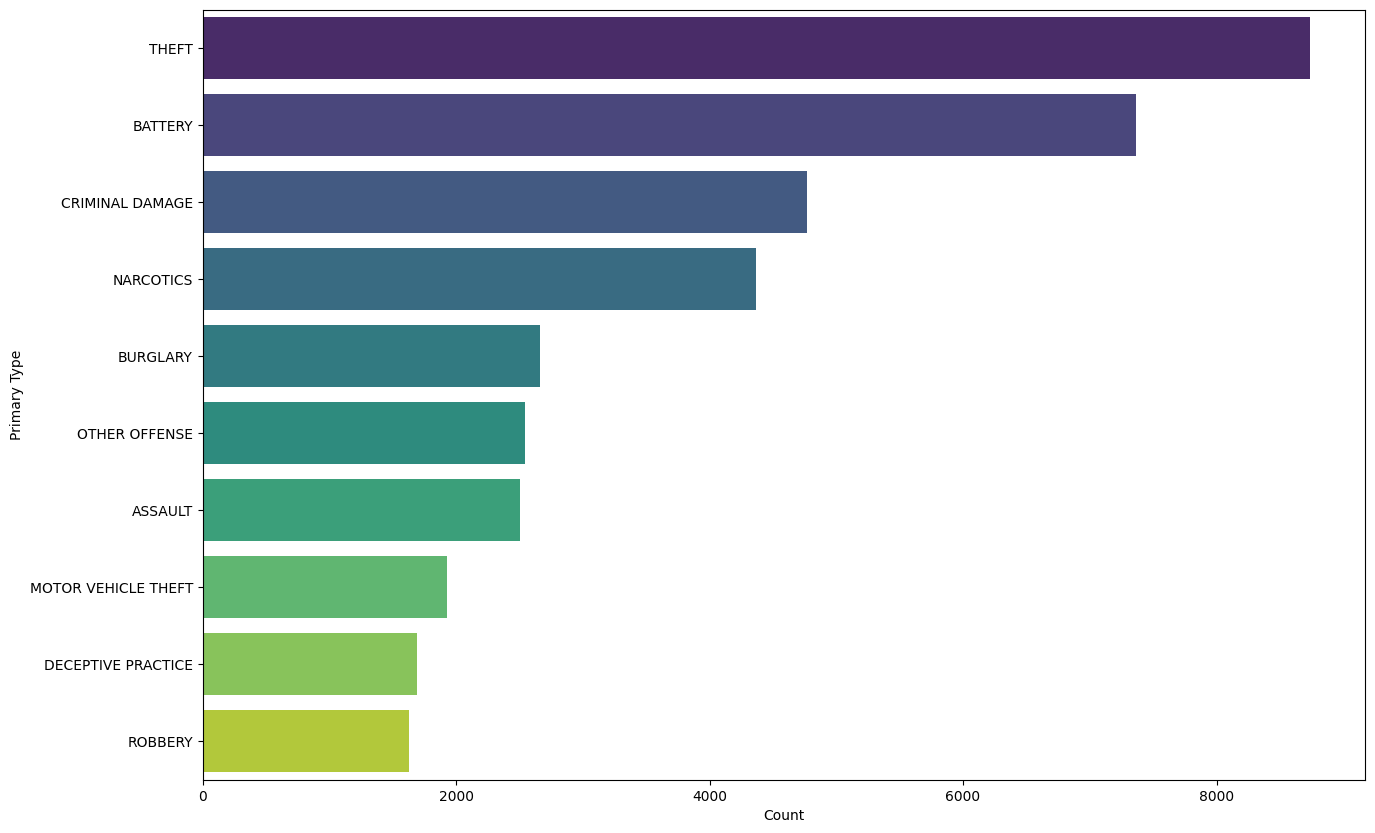

In [30]:
filtered_data = chicago_crime_dataset[chicago_crime_dataset['Primary Type'].isin(order_data)]


plt.figure(figsize=(15, 10))
sns.countplot(y='Primary Type', data=filtered_data, order=order_data,palette='viridis')
plt.xlabel('Count')
plt.ylabel('Primary Type')
plt.show()

In [31]:
order_data2=chicago_crime_dataset['Primary Type'].value_counts().index

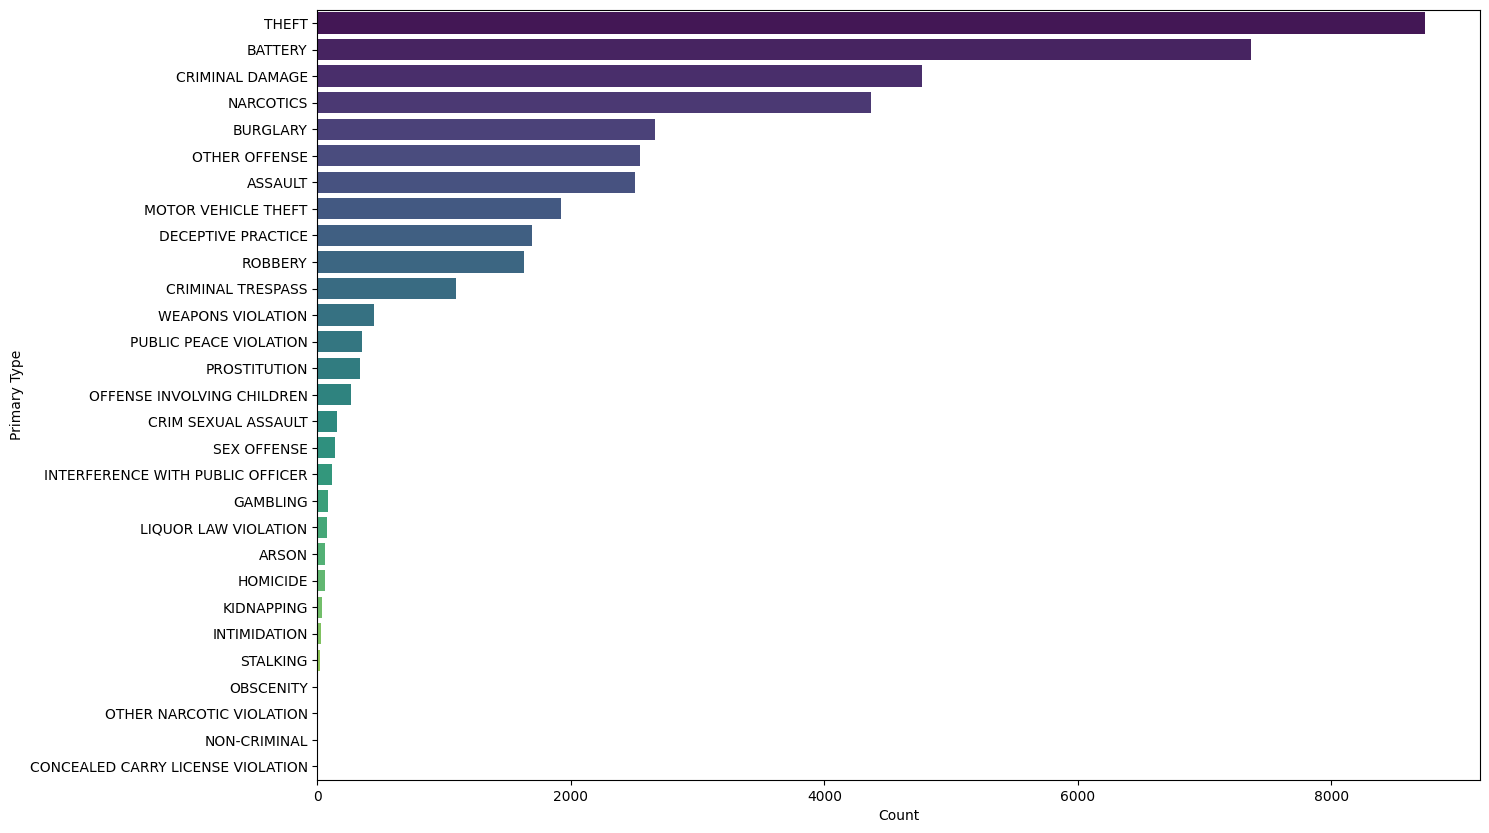

In [32]:
filtered_data = chicago_crime_dataset[chicago_crime_dataset['Primary Type'].isin(order_data2)]


plt.figure(figsize=(15, 10))
sns.countplot(y='Primary Type', data=filtered_data, order=order_data2,palette='viridis')
plt.xlabel('Count')
plt.ylabel('Primary Type')
plt.show()

## **Count on Location Description**

In [33]:
chicago_crime_dataset


,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
108584,2008-03-31 14:15:00,019XX S MICHIGAN AVE,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False
325848,2008-09-28 00:20:00,113XX S ELIZABETH ST,BATTERY,SIMPLE,RESIDENCE,True,False
1529438,2008-11-14 11:15:00,003XX N PARKSIDE AVE,NARCOTICS,POSS: HEROIN(WHITE),STREET,True,False
936991,2010-05-03 07:00:00,062XX W PETERSON AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True
2156251,2010-07-05 00:00:00,008XX S PARK TER,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False
...,...,...,...,...,...,...,...
83769,2012-01-09 13:44:00,033XX N DAMEN AVE,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,False,True
149009,2012-03-28 04:50:00,010XX N LECLAIRE AVE,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,True,True
669889,2013-11-03 22:32:00,042XX S INDIANA AVE,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,True,False
893384,2014-08-31 00:14:00,011XX N DEARBORN ST,BATTERY,SIMPLE,STREET,False,False


In [34]:
order_data1=chicago_crime_dataset['Location Description'].value_counts().iloc[:10].index

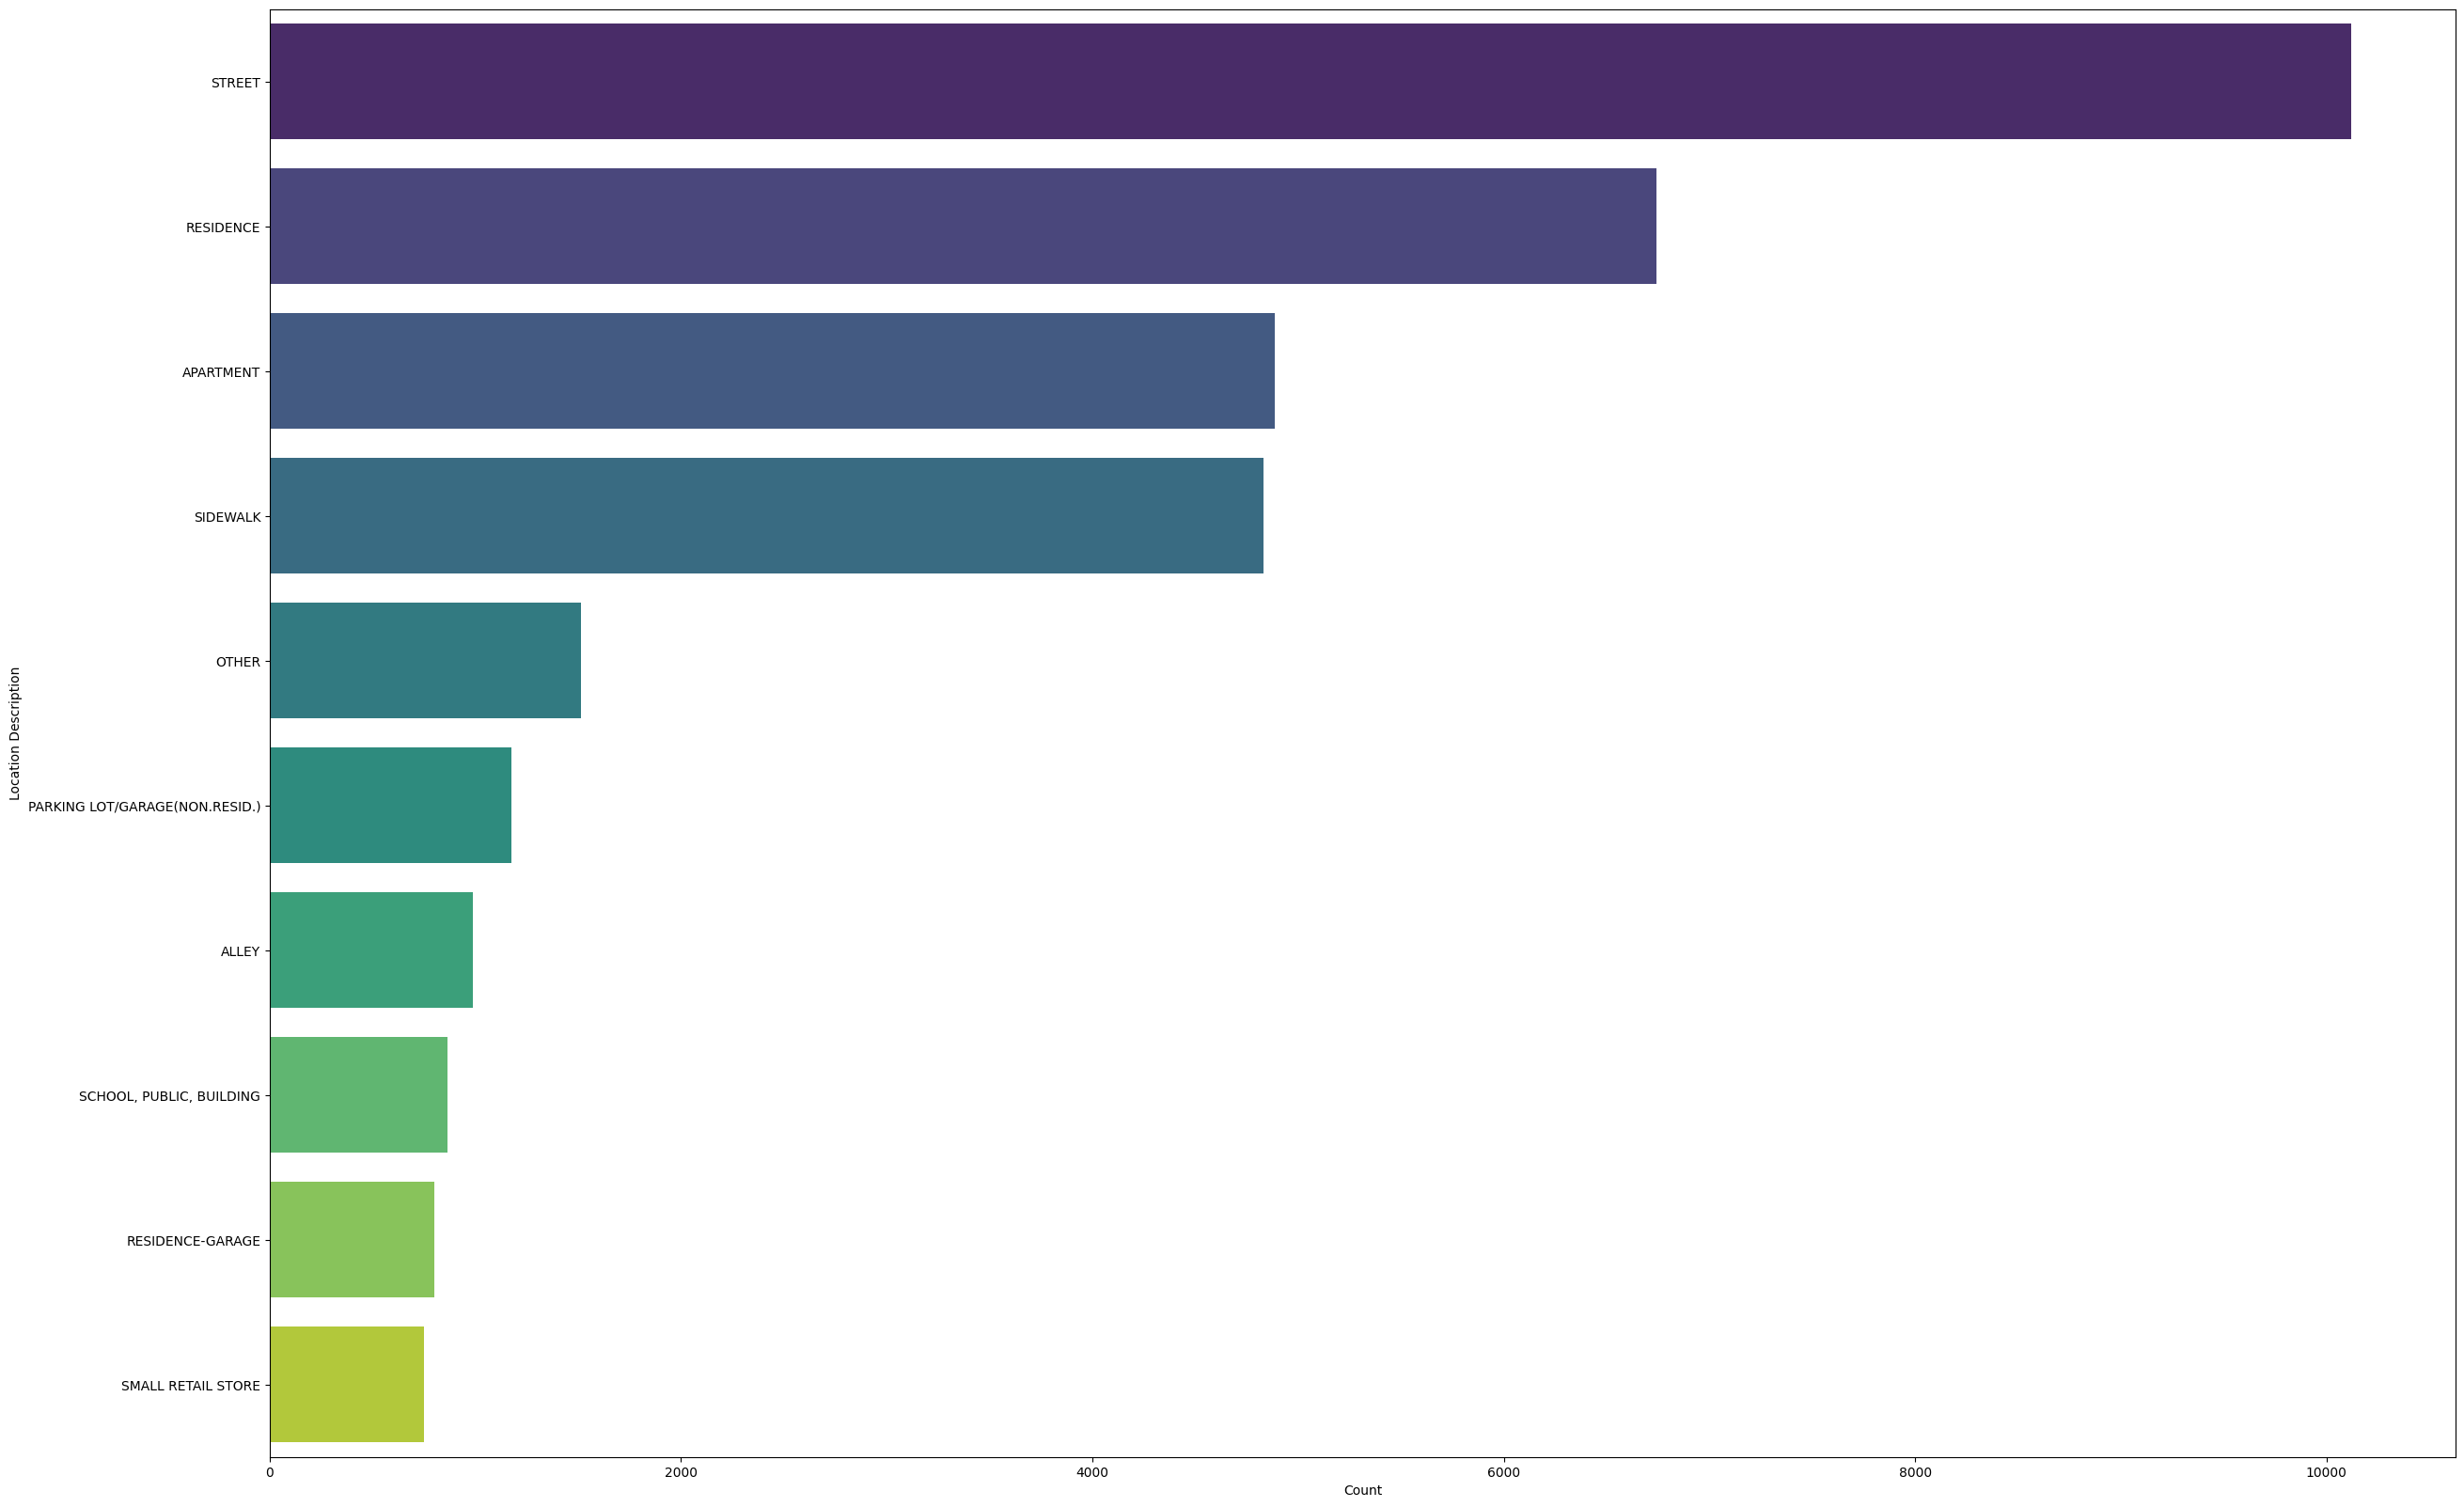

In [35]:
filtered_data = chicago_crime_dataset[chicago_crime_dataset['Location Description'].isin(order_data1)]
plt.figure(figsize=(30, 20))
sns.countplot(y='Location Description', data=filtered_data,order=order_data1, palette='viridis')
plt.xlabel('Count')
plt.ylabel('Location Description')
plt.show()

## **Crime in Chicago based on Year**

In [36]:
chicago_crime_dataset


,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
108584,2008-03-31 14:15:00,019XX S MICHIGAN AVE,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False
325848,2008-09-28 00:20:00,113XX S ELIZABETH ST,BATTERY,SIMPLE,RESIDENCE,True,False
1529438,2008-11-14 11:15:00,003XX N PARKSIDE AVE,NARCOTICS,POSS: HEROIN(WHITE),STREET,True,False
936991,2010-05-03 07:00:00,062XX W PETERSON AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True
2156251,2010-07-05 00:00:00,008XX S PARK TER,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False
...,...,...,...,...,...,...,...
83769,2012-01-09 13:44:00,033XX N DAMEN AVE,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,False,True
149009,2012-03-28 04:50:00,010XX N LECLAIRE AVE,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,True,True
669889,2013-11-03 22:32:00,042XX S INDIANA AVE,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,True,False
893384,2014-08-31 00:14:00,011XX N DEARBORN ST,BATTERY,SIMPLE,STREET,False,False


In [37]:
chicago_crime_dataset.Date

108584    2008-03-31 14:15:00
325848    2008-09-28 00:20:00
1529438   2008-11-14 11:15:00
936991    2010-05-03 07:00:00
2156251   2010-07-05 00:00:00
                  ...        
83769     2012-01-09 13:44:00
149009    2012-03-28 04:50:00
669889    2013-11-03 22:32:00
893384    2014-08-31 00:14:00
1382014   2016-10-07 11:45:00
Name: Date, Length: 41454, dtype: datetime64[ns]

In [38]:
chicago_crime_dataset.Date=chicago_crime_dataset.Date.dt.strftime('%Y-%m-%d')

In [39]:
chicago_crime_dataset

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
108584,2008-03-31,019XX S MICHIGAN AVE,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False
325848,2008-09-28,113XX S ELIZABETH ST,BATTERY,SIMPLE,RESIDENCE,True,False
1529438,2008-11-14,003XX N PARKSIDE AVE,NARCOTICS,POSS: HEROIN(WHITE),STREET,True,False
936991,2010-05-03,062XX W PETERSON AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True
2156251,2010-07-05,008XX S PARK TER,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False
...,...,...,...,...,...,...,...
83769,2012-01-09,033XX N DAMEN AVE,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,False,True
149009,2012-03-28,010XX N LECLAIRE AVE,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,True,True
669889,2013-11-03,042XX S INDIANA AVE,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,True,False
893384,2014-08-31,011XX N DEARBORN ST,BATTERY,SIMPLE,STREET,False,False


In [40]:
chicago_crime_dataset.Date

108584     2008-03-31
325848     2008-09-28
1529438    2008-11-14
936991     2010-05-03
2156251    2010-07-05
              ...    
83769      2012-01-09
149009     2012-03-28
669889     2013-11-03
893384     2014-08-31
1382014    2016-10-07
Name: Date, Length: 41454, dtype: object

In [41]:
chicago_crime_dataset.Date=pd.to_datetime(chicago_crime_dataset.Date)

In [42]:
chicago_crime_dataset

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
108584,2008-03-31,019XX S MICHIGAN AVE,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False
325848,2008-09-28,113XX S ELIZABETH ST,BATTERY,SIMPLE,RESIDENCE,True,False
1529438,2008-11-14,003XX N PARKSIDE AVE,NARCOTICS,POSS: HEROIN(WHITE),STREET,True,False
936991,2010-05-03,062XX W PETERSON AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True
2156251,2010-07-05,008XX S PARK TER,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False
...,...,...,...,...,...,...,...
83769,2012-01-09,033XX N DAMEN AVE,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,False,True
149009,2012-03-28,010XX N LECLAIRE AVE,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,True,True
669889,2013-11-03,042XX S INDIANA AVE,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,True,False
893384,2014-08-31,011XX N DEARBORN ST,BATTERY,SIMPLE,STREET,False,False


In [43]:
chicago_crime_dataset.columns.tolist()

['Date',
 'Block',
 'Primary Type',
 'Description',
 'Location Description',
 'Arrest',
 'Domestic']

In [44]:
chicago_crime_dataset.Date

108584    2008-03-31
325848    2008-09-28
1529438   2008-11-14
936991    2010-05-03
2156251   2010-07-05
             ...    
83769     2012-01-09
149009    2012-03-28
669889    2013-11-03
893384    2014-08-31
1382014   2016-10-07
Name: Date, Length: 41454, dtype: datetime64[ns]

In [45]:
chicago_crime_dataset.Year=chicago_crime_dataset.Date.dt.year
chicago_crime_dataset

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
108584,2008-03-31,019XX S MICHIGAN AVE,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False
325848,2008-09-28,113XX S ELIZABETH ST,BATTERY,SIMPLE,RESIDENCE,True,False
1529438,2008-11-14,003XX N PARKSIDE AVE,NARCOTICS,POSS: HEROIN(WHITE),STREET,True,False
936991,2010-05-03,062XX W PETERSON AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True
2156251,2010-07-05,008XX S PARK TER,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False
...,...,...,...,...,...,...,...
83769,2012-01-09,033XX N DAMEN AVE,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,False,True
149009,2012-03-28,010XX N LECLAIRE AVE,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,True,True
669889,2013-11-03,042XX S INDIANA AVE,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,True,False
893384,2014-08-31,011XX N DEARBORN ST,BATTERY,SIMPLE,STREET,False,False


In [46]:
chicago_crime_dataset['Year']=chicago_crime_dataset.Year

In [47]:
chicago_crime_dataset

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Year
108584,2008-03-31,019XX S MICHIGAN AVE,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,2008
325848,2008-09-28,113XX S ELIZABETH ST,BATTERY,SIMPLE,RESIDENCE,True,False,2008
1529438,2008-11-14,003XX N PARKSIDE AVE,NARCOTICS,POSS: HEROIN(WHITE),STREET,True,False,2008
936991,2010-05-03,062XX W PETERSON AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,2010
2156251,2010-07-05,008XX S PARK TER,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,2010
...,...,...,...,...,...,...,...,...
83769,2012-01-09,033XX N DAMEN AVE,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,False,True,2012
149009,2012-03-28,010XX N LECLAIRE AVE,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,True,True,2012
669889,2013-11-03,042XX S INDIANA AVE,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,True,False,2013
893384,2014-08-31,011XX N DEARBORN ST,BATTERY,SIMPLE,STREET,False,False,2014


In [48]:
chicago_crime_dataset['Year'].value_counts()

Year
2008    8569
2009    7890
2010    6958
2011    3470
2012    3315
2013    3100
2014    2739
2016    2692
2015    2618
2017     103
Name: count, dtype: int64

In [49]:
import plotly.express as px

fig=px.bar(chicago_crime_dataset['Year'].value_counts())
fig.update_yaxes(title_text='Number of Crimes', visible=True,linecolor='red',gridcolor='red')
fig.update_xaxes(title_text='Year', visible=True,linecolor='red',gridcolor='blue')

fig.update_layout(title="Crimes in Chicago based on Year",title_x=0.5)
fig.show()

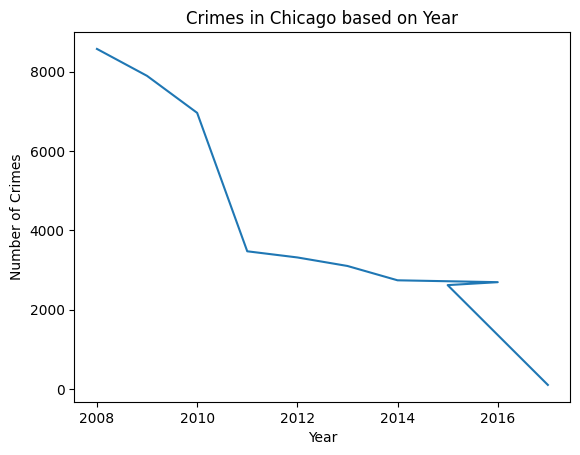

In [50]:
plt.plot(chicago_crime_dataset['Year'].value_counts())
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.title('Crimes in Chicago based on Year')
plt.show()

## **Crime in Chicago based on Months**

In [51]:
chicago_crime_dataset


,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Year
108584,2008-03-31,019XX S MICHIGAN AVE,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,2008
325848,2008-09-28,113XX S ELIZABETH ST,BATTERY,SIMPLE,RESIDENCE,True,False,2008
1529438,2008-11-14,003XX N PARKSIDE AVE,NARCOTICS,POSS: HEROIN(WHITE),STREET,True,False,2008
936991,2010-05-03,062XX W PETERSON AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,2010
2156251,2010-07-05,008XX S PARK TER,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,2010
...,...,...,...,...,...,...,...,...
83769,2012-01-09,033XX N DAMEN AVE,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,False,True,2012
149009,2012-03-28,010XX N LECLAIRE AVE,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,True,True,2012
669889,2013-11-03,042XX S INDIANA AVE,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,True,False,2013
893384,2014-08-31,011XX N DEARBORN ST,BATTERY,SIMPLE,STREET,False,False,2014


In [52]:
chicago_crime_dataset['Month']=chicago_crime_dataset.Date.dt.month
chicago_crime_dataset

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Year,Month
108584,2008-03-31,019XX S MICHIGAN AVE,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,2008,3
325848,2008-09-28,113XX S ELIZABETH ST,BATTERY,SIMPLE,RESIDENCE,True,False,2008,9
1529438,2008-11-14,003XX N PARKSIDE AVE,NARCOTICS,POSS: HEROIN(WHITE),STREET,True,False,2008,11
936991,2010-05-03,062XX W PETERSON AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,2010,5
2156251,2010-07-05,008XX S PARK TER,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,2010,7
...,...,...,...,...,...,...,...,...,...
83769,2012-01-09,033XX N DAMEN AVE,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,False,True,2012,1
149009,2012-03-28,010XX N LECLAIRE AVE,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,True,True,2012,3
669889,2013-11-03,042XX S INDIANA AVE,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,True,False,2013,11
893384,2014-08-31,011XX N DEARBORN ST,BATTERY,SIMPLE,STREET,False,False,2014,8


In [53]:
fig=px.bar(chicago_crime_dataset['Month'].value_counts())
fig.update_xaxes(title_text='Month')
fig.update_yaxes(title_text='Number of Crimes')
fig.update_layout(title='Crimes in Chicago based on Months',title_x=0.5)
fig.show()

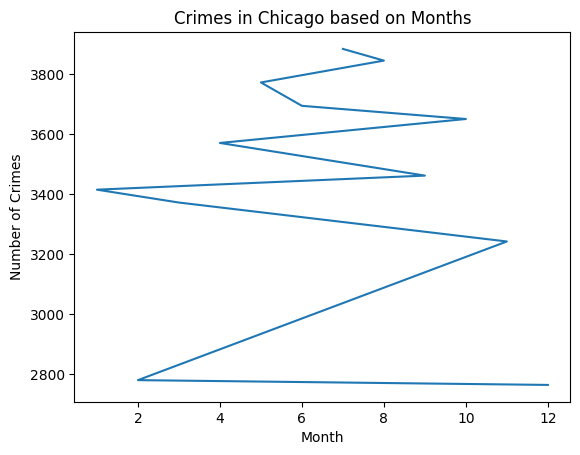

In [54]:
plt.plot(chicago_crime_dataset['Month'].value_counts())
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.title('Crimes in Chicago based on Months')
plt.show()

## **Crimes in Chicago Based on Quarters**

In [55]:
chicago_crime_dataset


,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Year,Month
108584,2008-03-31,019XX S MICHIGAN AVE,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,2008,3
325848,2008-09-28,113XX S ELIZABETH ST,BATTERY,SIMPLE,RESIDENCE,True,False,2008,9
1529438,2008-11-14,003XX N PARKSIDE AVE,NARCOTICS,POSS: HEROIN(WHITE),STREET,True,False,2008,11
936991,2010-05-03,062XX W PETERSON AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,2010,5
2156251,2010-07-05,008XX S PARK TER,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,2010,7
...,...,...,...,...,...,...,...,...,...
83769,2012-01-09,033XX N DAMEN AVE,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,False,True,2012,1
149009,2012-03-28,010XX N LECLAIRE AVE,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,True,True,2012,3
669889,2013-11-03,042XX S INDIANA AVE,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,True,False,2013,11
893384,2014-08-31,011XX N DEARBORN ST,BATTERY,SIMPLE,STREET,False,False,2014,8


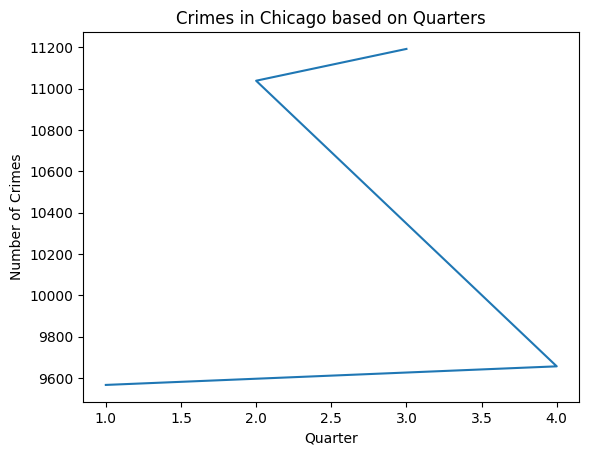

In [56]:
 plt.plot(chicago_crime_dataset['Date'].dt.quarter.value_counts())
 plt.xlabel('Quarter')
 plt.ylabel('Number of Crimes')
 plt.title('Crimes in Chicago based on Quarters')
 plt.show()

In [57]:
fig=px.bar(chicago_crime_dataset['Date'].dt.quarter.value_counts())
fig.update_xaxes(title_text='Month')
fig.update_yaxes(title_text='Number of Crimes')
fig.update_layout(title='Crimes in Chicago based on Months',title_x=0.5)
fig.show()

# **Prepare the Data**

## **Prepare the Data Monthwise**

In [58]:
chicago_crime_dataset


,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Year,Month
108584,2008-03-31,019XX S MICHIGAN AVE,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,2008,3
325848,2008-09-28,113XX S ELIZABETH ST,BATTERY,SIMPLE,RESIDENCE,True,False,2008,9
1529438,2008-11-14,003XX N PARKSIDE AVE,NARCOTICS,POSS: HEROIN(WHITE),STREET,True,False,2008,11
936991,2010-05-03,062XX W PETERSON AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,2010,5
2156251,2010-07-05,008XX S PARK TER,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,2010,7
...,...,...,...,...,...,...,...,...,...
83769,2012-01-09,033XX N DAMEN AVE,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,False,True,2012,1
149009,2012-03-28,010XX N LECLAIRE AVE,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,True,True,2012,3
669889,2013-11-03,042XX S INDIANA AVE,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,True,False,2013,11
893384,2014-08-31,011XX N DEARBORN ST,BATTERY,SIMPLE,STREET,False,False,2014,8


In [59]:
chicago_crime_dataset.set_index('Date', inplace=True)


In [60]:
chicago_crime_dataset


,Block,Primary Type,Description,Location Description,Arrest,Domestic,Year,Month
Date,,,,,,,,
2008-03-31,019XX S MICHIGAN AVE,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,2008,3
2008-09-28,113XX S ELIZABETH ST,BATTERY,SIMPLE,RESIDENCE,True,False,2008,9
2008-11-14,003XX N PARKSIDE AVE,NARCOTICS,POSS: HEROIN(WHITE),STREET,True,False,2008,11
2010-05-03,062XX W PETERSON AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,2010,5
2010-07-05,008XX S PARK TER,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,2010,7
...,...,...,...,...,...,...,...,...
2012-01-09,033XX N DAMEN AVE,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,False,True,2012,1
2012-03-28,010XX N LECLAIRE AVE,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,True,True,2012,3
2013-11-03,042XX S INDIANA AVE,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,True,False,2013,11


In [66]:
chicago_prophet=chicago_crime_dataset.resample('M').size().reset_index()  #Counts the total number of crimes being committed in each month of each year
chicago_prophet

,Date,0
0,2008-01-31,687
1,2008-02-29,544
2,2008-03-31,677
3,2008-04-30,744
4,2008-05-31,794
...,...,...
104,2016-09-30,224
105,2016-10-31,258
106,2016-11-30,215
107,2016-12-31,177


In [67]:
chicago_crime_dataset

,Block,Primary Type,Description,Location Description,Arrest,Domestic,Year,Month
Date,,,,,,,,
2008-03-31,019XX S MICHIGAN AVE,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,2008,3
2008-09-28,113XX S ELIZABETH ST,BATTERY,SIMPLE,RESIDENCE,True,False,2008,9
2008-11-14,003XX N PARKSIDE AVE,NARCOTICS,POSS: HEROIN(WHITE),STREET,True,False,2008,11
2010-05-03,062XX W PETERSON AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,2010,5
2010-07-05,008XX S PARK TER,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,2010,7
...,...,...,...,...,...,...,...,...
2012-01-09,033XX N DAMEN AVE,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,False,True,2012,1
2012-03-28,010XX N LECLAIRE AVE,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,True,True,2012,3
2013-11-03,042XX S INDIANA AVE,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,True,False,2013,11


In [69]:
chicago_prophet.columns=['Date','Crime Count']

In [70]:
chicago_prophet

,Date,Crime Count
0,2008-01-31,687
1,2008-02-29,544
2,2008-03-31,677
3,2008-04-30,744
4,2008-05-31,794
...,...,...
104,2016-09-30,224
105,2016-10-31,258
106,2016-11-30,215
107,2016-12-31,177


In [73]:
chicago_crime_final_dataframe=chicago_prophet.rename(columns={"Date":'ds','Crime Count':'y'})
chicago_crime_final_dataframe

,ds,y
0,2008-01-31,687
1,2008-02-29,544
2,2008-03-31,677
3,2008-04-30,744
4,2008-05-31,794
...,...,...
104,2016-09-30,224
105,2016-10-31,258
106,2016-11-30,215
107,2016-12-31,177


# **Predict the Crime Count**

## **Based on Year predict the crime count of the next year**

In [74]:
model=Prophet()
model.fit(chicago_crime_final_dataframe)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq7vnqoc2/0qv0epyx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq7vnqoc2/vedlthfv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24246', 'data', 'file=/tmp/tmpq7vnqoc2/0qv0epyx.json', 'init=/tmp/tmpq7vnqoc2/vedlthfv.json', 'output', 'file=/tmp/tmpq7vnqoc2/prophet_modellwv26khq/prophet_model-20240806101449.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:14:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:14:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [75]:
future=model.make_future_dataframe(periods=365)#Making the periods by specifying the number of days
forecast=model.predict(future)

In [76]:
forecast #The trends have been created

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2008-01-31,791.826476,662.979164,813.382942,791.826476,791.826476,-51.037361,-51.037361,-51.037361,-51.037361,-51.037361,-51.037361,0.0,0.0,0.0,740.789115
1,2008-02-29,782.372184,608.290369,754.370616,782.372184,782.372184,-102.948811,-102.948811,-102.948811,-102.948811,-102.948811,-102.948811,0.0,0.0,0.0,679.423373
2,2008-03-31,772.265873,670.035855,826.835896,772.265873,772.265873,-22.985333,-22.985333,-22.985333,-22.985333,-22.985333,-22.985333,0.0,0.0,0.0,749.280540
3,2008-04-30,762.485571,687.586717,837.432821,762.485571,762.485571,0.997868,0.997868,0.997868,0.997868,0.997868,0.997868,0.0,0.0,0.0,763.483439
4,2008-05-31,752.379259,701.179885,854.496985,752.379259,752.379259,25.781695,25.781695,25.781695,25.781695,25.781695,25.781695,0.0,0.0,0.0,778.160954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,2018-01-27,165.868558,26.053136,174.543702,160.632928,171.964669,-68.006780,-68.006780,-68.006780,-68.006780,-68.006780,-68.006780,0.0,0.0,0.0,97.861778
470,2018-01-28,165.814083,24.377900,177.320728,160.560001,171.930512,-63.984637,-63.984637,-63.984637,-63.984637,-63.984637,-63.984637,0.0,0.0,0.0,101.829446
471,2018-01-29,165.759608,30.029780,181.645090,160.487075,171.896355,-59.276322,-59.276322,-59.276322,-59.276322,-59.276322,-59.276322,0.0,0.0,0.0,106.483286
472,2018-01-30,165.705133,33.881764,189.744314,160.381399,171.862197,-53.929558,-53.929558,-53.929558,-53.929558,-53.929558,-53.929558,0.0,0.0,0.0,111.775575


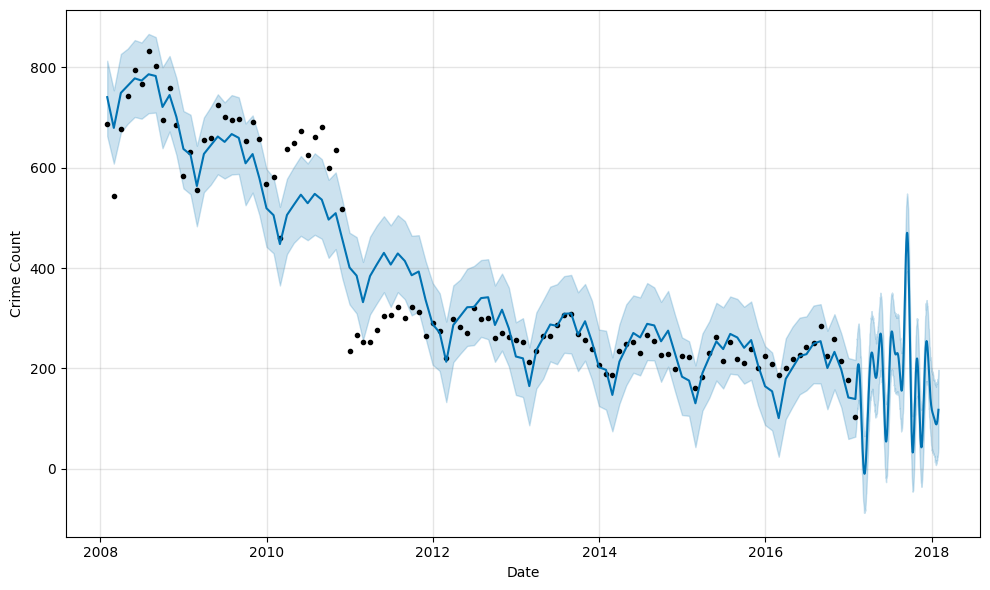

In [78]:
figure=model.plot(forecast,xlabel='Date',ylabel='Crime Count')

## **Seasonality within a year**

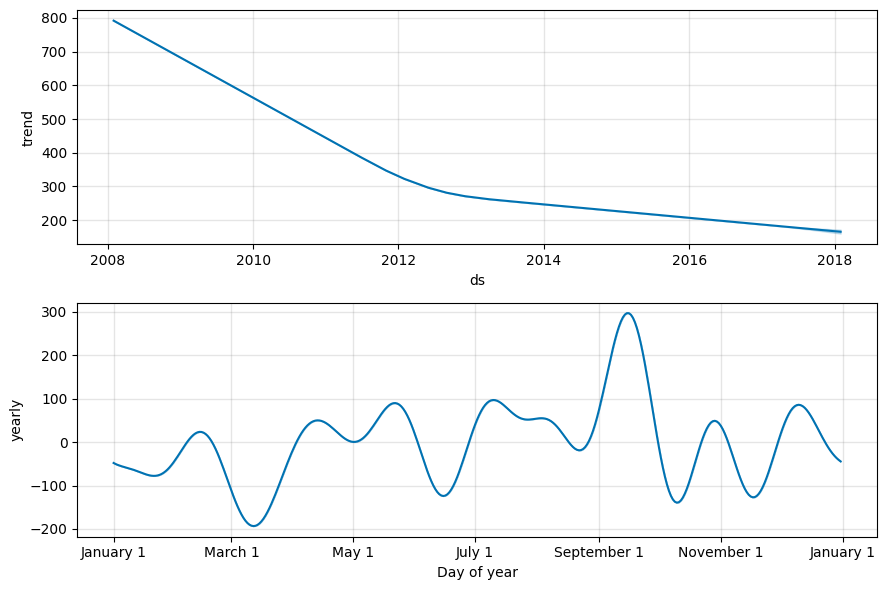

In [79]:
figure=model.plot_components(forecast)

## **Predict the crime count of the next two years**

In [80]:
future=model.make_future_dataframe(periods=730)#Making the periods by specifying the number of days
forecast=model.predict(future)

In [81]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2008-01-31,791.826476,657.870263,819.665024,791.826476,791.826476,-51.037361,-51.037361,-51.037361,-51.037361,-51.037361,-51.037361,0.0,0.0,0.0,740.789115
1,2008-02-29,782.372184,604.927757,756.614100,782.372184,782.372184,-102.948811,-102.948811,-102.948811,-102.948811,-102.948811,-102.948811,0.0,0.0,0.0,679.423373
2,2008-03-31,772.265873,677.723752,828.205842,772.265873,772.265873,-22.985333,-22.985333,-22.985333,-22.985333,-22.985333,-22.985333,0.0,0.0,0.0,749.280540
3,2008-04-30,762.485571,687.573621,841.347382,762.485571,762.485571,0.997868,0.997868,0.997868,0.997868,0.997868,0.997868,0.0,0.0,0.0,763.483439
4,2008-05-31,752.379259,702.492577,853.262062,752.379259,752.379259,25.781695,25.781695,25.781695,25.781695,25.781695,25.781695,0.0,0.0,0.0,778.160954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,2019-01-27,145.985233,-6.702398,162.979169,130.111010,165.792477,-68.901509,-68.901509,-68.901509,-68.901509,-68.901509,-68.901509,0.0,0.0,0.0,77.083724
835,2019-01-28,145.930758,5.488644,161.951810,130.030334,165.792341,-65.055904,-65.055904,-65.055904,-65.055904,-65.055904,-65.055904,0.0,0.0,0.0,80.874854
836,2019-01-29,145.876283,5.959641,164.963450,129.949658,165.786362,-60.515478,-60.515478,-60.515478,-60.515478,-60.515478,-60.515478,0.0,0.0,0.0,85.360805
837,2019-01-30,145.821808,14.015847,169.937697,129.868982,165.751922,-55.322708,-55.322708,-55.322708,-55.322708,-55.322708,-55.322708,0.0,0.0,0.0,90.499100


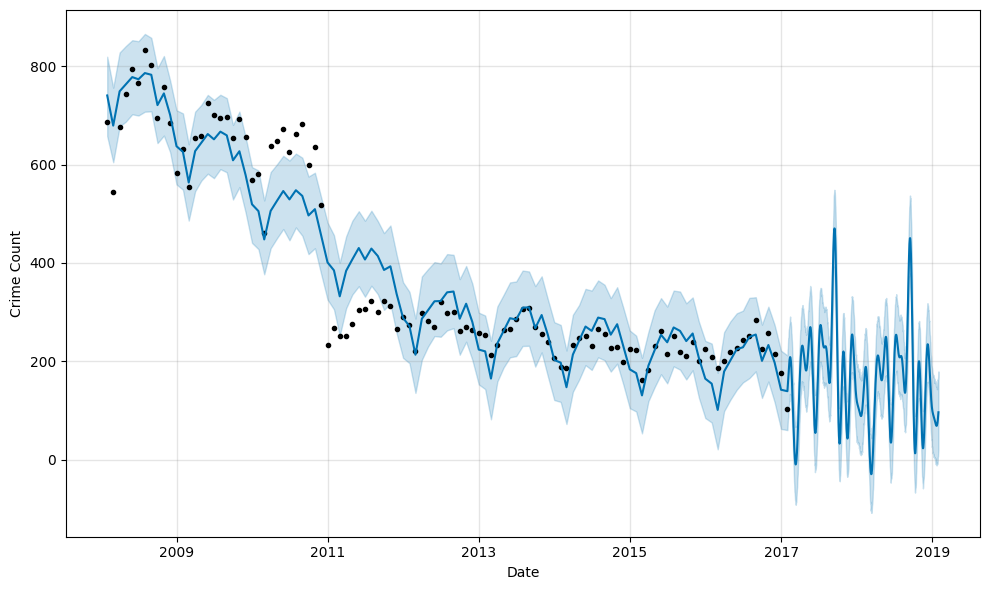

In [82]:
figure=model.plot(forecast,xlabel='Date',ylabel='Crime Count')

## **Check for seasonality**

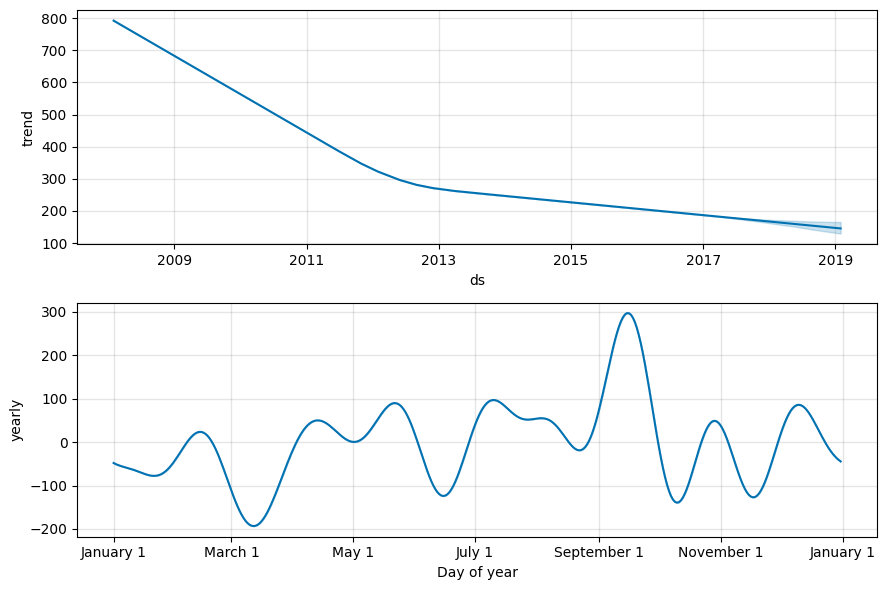

In [83]:
figure=model.plot_components(forecast)

## **Predict the Crime Count for the next 10 years**

In [84]:
future=model.make_future_dataframe(periods=3650)
forecast=model.predict(future)

In [85]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2008-01-31,791.826476,663.101992,819.850564,791.826476,791.826476,-51.037361,-51.037361,-51.037361,-51.037361,-51.037361,-51.037361,0.0,0.0,0.0,740.789115
1,2008-02-29,782.372184,598.379791,761.113205,782.372184,782.372184,-102.948811,-102.948811,-102.948811,-102.948811,-102.948811,-102.948811,0.0,0.0,0.0,679.423373
2,2008-03-31,772.265873,667.318819,827.784106,772.265873,772.265873,-22.985333,-22.985333,-22.985333,-22.985333,-22.985333,-22.985333,0.0,0.0,0.0,749.280540
3,2008-04-30,762.485571,682.707541,839.589777,762.485571,762.485571,0.997868,0.997868,0.997868,0.997868,0.997868,0.997868,0.0,0.0,0.0,763.483439
4,2008-05-31,752.379259,699.489413,848.915323,752.379259,752.379259,25.781695,25.781695,25.781695,25.781695,25.781695,25.781695,0.0,0.0,0.0,778.160954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3754,2027-01-25,-13.081369,-305.149636,136.171738,-211.776496,200.437223,-74.442437,-74.442437,-74.442437,-74.442437,-74.442437,-74.442437,0.0,0.0,0.0,-87.523807
3755,2027-01-26,-13.135844,-306.291693,126.634150,-211.971910,200.475653,-72.030742,-72.030742,-72.030742,-72.030742,-72.030742,-72.030742,0.0,0.0,0.0,-85.166586
3756,2027-01-27,-13.190319,-299.735970,147.782975,-212.167323,200.514082,-68.901509,-68.901509,-68.901509,-68.901509,-68.901509,-68.901509,0.0,0.0,0.0,-82.091828
3757,2027-01-28,-13.244794,-291.601727,151.601145,-212.362737,200.552512,-65.055904,-65.055904,-65.055904,-65.055904,-65.055904,-65.055904,0.0,0.0,0.0,-78.300698


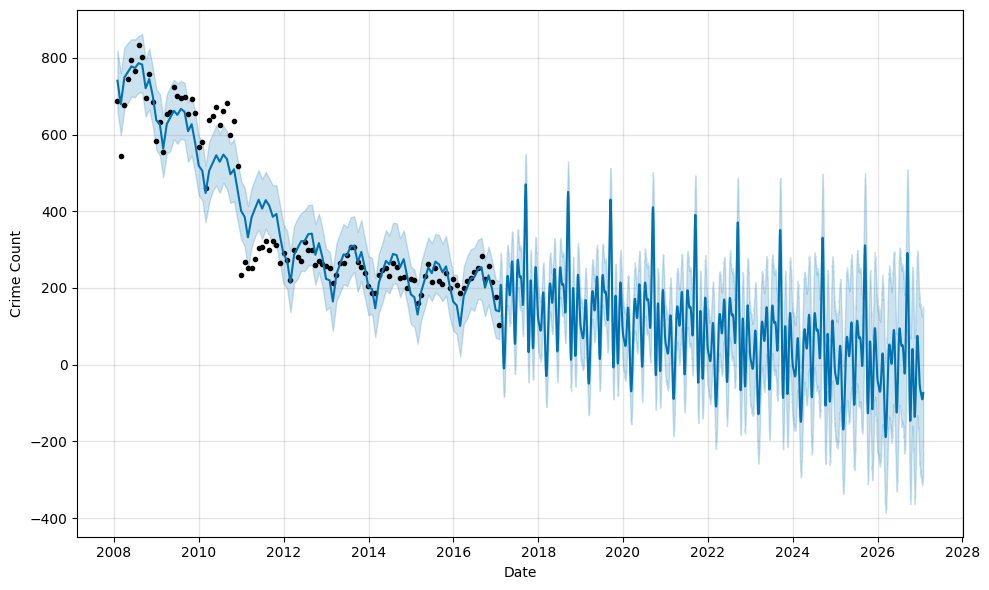

In [87]:
figure=model.plot(forecast,xlabel='Date',ylabel='Crime Count')

## **Seasonality Check for the next 10 years**

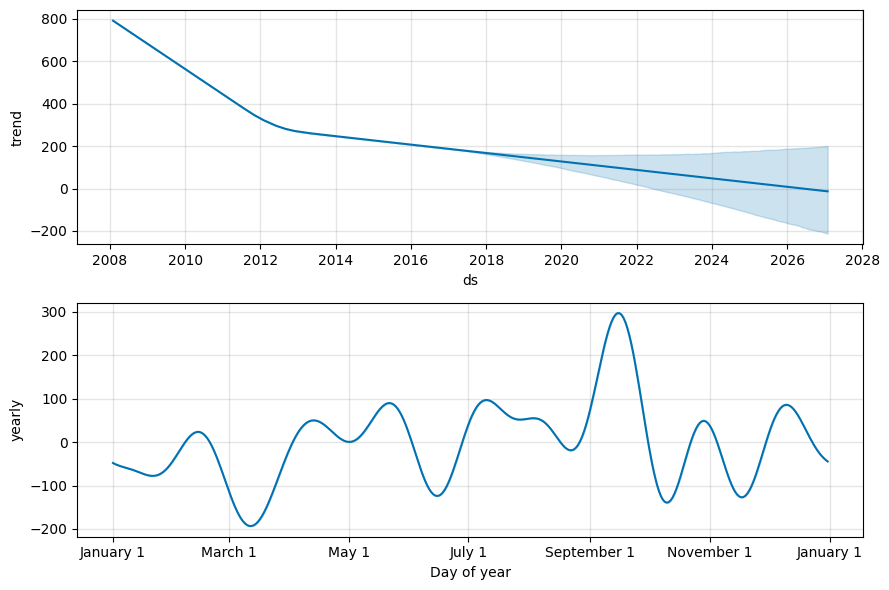

In [88]:
figure=model.plot_components(forecast)